In [1]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from time import sleep
from random import randint

In [2]:
def rm_special_characters(string): 

    new_string = re.sub(r"[^a-zA-Z0-9]", "", string)

    return new_string

In [3]:
def extractor(url):
    data=[]
    print("Extracting data..........")
    NoneType = type(None)
    for pgno in range(1,6):
        html_text=req.get(url+str(pgno)).text
        sleep(randint(5,15))
        soup = bs(html_text,"html.parser")
        container=soup.find("div",class_="_1YokD2 _3Mn1Gg")
        cards=container.find_all("div",class_="_1AtVbE col-12-12")
        for card in cards:
            keys=card.find_all("div",class_="_4ddWXP")
            for key in keys:
                title= key.find("a",class_="s1Q9rs").text
                price=key.find("div",class_="_30jeq3").text
                newPrice =  rm_special_characters(price)
                rating=key.find("div",class_="_3LWZlK")
                if(type(rating)==NoneType):
                    rating="0"
                else:
                    rating=rating.text
                l=[title,int(newPrice),float(rating)]
                data.append(l)
    return data

In [4]:
def analyser(data):
    print("Extracting data done.")
    print("Analysing data..........")
    df = pd.DataFrame(data, columns = ["Title", "Price (₹)","Rating"])
    df["Rating"]=df["Rating"].replace(to_replace=0.0, method='ffill')
    minPriceKey=df["Title"][df["Price (₹)"].idxmin()]
    maxPriceKey=df["Title"][df["Price (₹)"].idxmax()]
    minRatingKey=df["Title"][df["Rating"].idxmin()]
    maxRatingKey=df["Title"][df["Rating"].idxmax()]
    print("Analysing data done.")
    print(f'''
    Here is my Analysis:

    Item with the Highest Price is: {maxPriceKey}

    Item with the Highest Rating is: {maxRatingKey}
    
    Item with Lowest Price is: {minPriceKey}
    
    Item with lowest Rating is: {minRatingKey}
    ''')
    
    xpoints = np.array(df["Price (₹)"])
    ypoints = np.array(df["Rating"])
    plt.title("Price vs Rating")
    plt.xlabel("Price")
    plt.ylabel("Rating")
    plt.scatter(xpoints, ypoints)
    plt.show()


    Enter number to search
    1 for Python Books,
    2 for toys,
    3 for computers
3
Extracting data..........
Extracting data done.
Analysing data..........
Analysing data done.

    Here is my Analysis:

    Item with the Highest Price is: APPLE iMac Core i7 (10th Gen) (8 GB DDR4/512 GB SSD/Mac...

    Item with the Highest Rating is: APPLE iMac Core i7 (10th Gen) (8 GB DDR4/512 GB SSD/Mac...
    
    Item with Lowest Price is: Artek Mini Android 7.1,Smart TV Box with Amlogic S905W ...
    
    Item with lowest Rating is: ENTWINO Core i7 2600 (8 RAM/Nvidia Graphics Card Graphi...
    


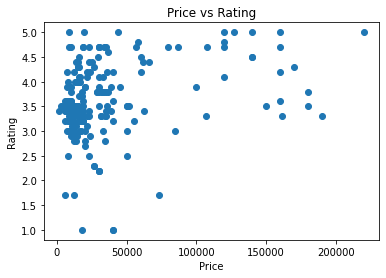

In [5]:
def main():
    key_words=["https://www.flipkart.com/search?q=python+books&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=",
               "https://www.flipkart.com/search?q=toys&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=", 
               "https://www.flipkart.com/search?q=computers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="]
    try:
        key=int(input(f'''
    Enter number to search
    1 for Python Books,
    2 for toys,
    3 for computers\n'''))
        data=extractor(key_words[key-1])
        analyser(data)
    except:
        print("Invalid")

if __name__ == "__main__":
    main()